In [1]:
import pandas as pd

density_file = 'ecust_dataset/density.xlsx'
density_sheets = pd.read_excel(density_file, sheet_name=None)

density_df = pd.concat(density_sheets.values(), ignore_index=True)

In [2]:
density_df

,id,type,volume(mm^3),weight(g)
0,apple001,apple,310,244.5
1,apple002,apple,290,232.5
2,apple003,apple,280,219.0
3,apple004,apple,300,234.0
4,apple005,apple,280,212.5
...,...,...,...,...
169,sachima005,sachima,150,32.7
170,tomato001,tomato,210,214.5
171,tomato002,tomato,190,154.2
172,tomato003,tomato,180,186.4


In [3]:
density_df.rename(columns={'type': 'class'}, inplace=True)

# density_df['volume(mm^3)'] = density_df['volume(mm^3)'] * 1000

density_df


,id,class,volume(mm^3),weight(g)
0,apple001,apple,310,244.5
1,apple002,apple,290,232.5
2,apple003,apple,280,219.0
3,apple004,apple,300,234.0
4,apple005,apple,280,212.5
...,...,...,...,...
169,sachima005,sachima,150,32.7
170,tomato001,tomato,210,214.5
171,tomato002,tomato,190,154.2
172,tomato003,tomato,180,186.4


In [4]:
predictions_file = 'ecust_yolo_final_volume_calorie_predictions.csv'
predictions_df = pd.read_csv(predictions_file)

predictions_df

,image,class,volume_mm3,mass_g,calories
0,apple002S(2).jpg,apple,256502.795903,200.072181,104.037534
1,apple002S(3).jpg,apple,188355.941432,146.917634,76.397170
2,apple002S(7).jpg,apple,155589.940520,121.360154,63.107280
3,apple002T(2).jpg,apple,261750.508950,204.165397,106.166006
4,apple003S(3).jpg,apple,211052.864207,164.621234,85.603042
...,...,...,...,...,...
466,tomato002S(3).jpg,tomato,98849.794586,96.872799,26.155656
467,tomato002S(5).jpg,tomato,116301.285101,113.975259,30.773320
468,tomato002S(6).jpg,tomato,100745.105787,98.730204,26.657155
469,tomato002S(7).jpg,tomato,131463.344991,128.834078,34.785201


In [5]:
predictions_df['id'] = predictions_df['image'].str.replace(r'\(.*\)', '', regex=True)
predictions_df['id'] = predictions_df['id'].str.replace('.jpg', '', regex=False)
predictions_df['id'] = predictions_df['id'].str.replace(r'[ST]$', '', regex=True)

predictions_df

,image,class,volume_mm3,mass_g,calories,id
0,apple002S(2).jpg,apple,256502.795903,200.072181,104.037534,apple002
1,apple002S(3).jpg,apple,188355.941432,146.917634,76.397170,apple002
2,apple002S(7).jpg,apple,155589.940520,121.360154,63.107280,apple002
3,apple002T(2).jpg,apple,261750.508950,204.165397,106.166006,apple002
4,apple003S(3).jpg,apple,211052.864207,164.621234,85.603042,apple003
...,...,...,...,...,...,...
466,tomato002S(3).jpg,tomato,98849.794586,96.872799,26.155656,tomato002
467,tomato002S(5).jpg,tomato,116301.285101,113.975259,30.773320,tomato002
468,tomato002S(6).jpg,tomato,100745.105787,98.730204,26.657155,tomato002
469,tomato002S(7).jpg,tomato,131463.344991,128.834078,34.785201,tomato002


In [6]:
predictions_grouped = predictions_df.groupby(['id', 'class'], as_index=False)['volume_mm3'].mean()
predictions_grouped

,id,class,volume_mm3
0,apple002,apple,215549.796702
1,apple003,apple,211052.864207
2,apple004,apple,305125.978956
3,apple005,apple,252430.442538
4,apple006,apple,258709.028861
...,...,...,...
76,qiwi005,qiwi,134393.719606
77,sachima001,sachima,103390.548793
78,sachima002,sachima,96022.550711
79,tomato001,tomato,201068.309032


In [7]:
merged_df = pd.merge(predictions_grouped, density_df, on=['id', 'class'])
merged_df


,id,class,volume_mm3,volume(mm^3),weight(g)
0,apple002,apple,215549.796702,290,232.5
1,apple003,apple,211052.864207,280,219.0
2,apple004,apple,305125.978956,300,234.0
3,apple005,apple,252430.442538,280,212.5
4,apple006,apple,258709.028861,290,238.0
...,...,...,...,...,...
74,qiwi005,qiwi,134393.719606,190,196.0
75,sachima001,sachima,103390.548793,170,37.6
76,sachima002,sachima,96022.550711,150,32.9
77,tomato001,tomato,201068.309032,210,214.5


In [8]:
merged_df['volume(mm^3)'] = merged_df['volume(mm^3)'] * 1000
merged_df


,id,class,volume_mm3,volume(mm^3),weight(g)
0,apple002,apple,215549.796702,290000,232.5
1,apple003,apple,211052.864207,280000,219.0
2,apple004,apple,305125.978956,300000,234.0
3,apple005,apple,252430.442538,280000,212.5
4,apple006,apple,258709.028861,290000,238.0
...,...,...,...,...,...
74,qiwi005,qiwi,134393.719606,190000,196.0
75,sachima001,sachima,103390.548793,170000,37.6
76,sachima002,sachima,96022.550711,150000,32.9
77,tomato001,tomato,201068.309032,210000,214.5


In [9]:
merged_df['error_percent'] = ((merged_df['volume_mm3'] - merged_df['volume(mm^3)']) / merged_df['volume(mm^3)']) * 100

mean_error_per_class = merged_df.groupby('class')['error_percent'].mean().reset_index()
mean_error_per_class


,class,error_percent
0,apple,-21.658482
1,banana,-31.112348
2,bread,-44.730443
3,bun,-35.263480
4,doughnut,-55.279523
5,egg,-9.671709
6,fired_dough_twist,-38.103801
7,grape,43.510351
8,lemon,-16.232390
9,litchi,-14.893616


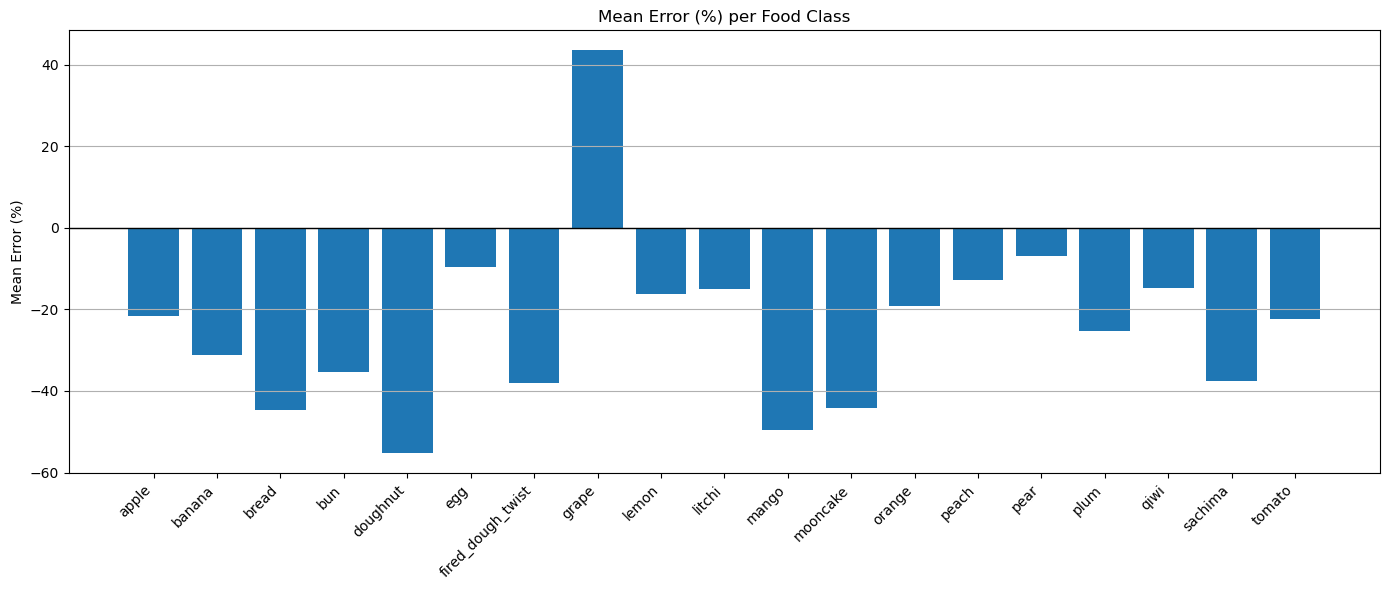

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(mean_error_per_class['class'], mean_error_per_class['error_percent'])
plt.axhline(0, color='black', linewidth=1)  
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Error (%)')
plt.title('Mean Error (%) per Food Class')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


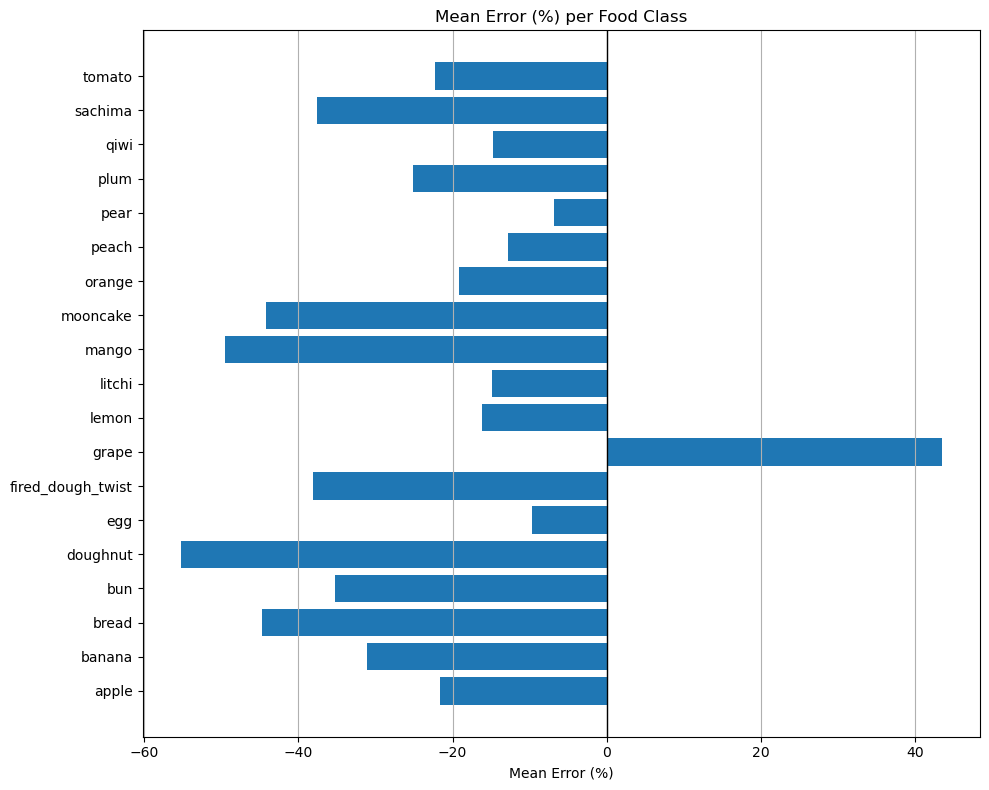

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
plt.barh(mean_error_per_class['class'], mean_error_per_class['error_percent'])
plt.axvline(0, color='black', linewidth=1)  
plt.yticks(rotation=0)
plt.xlabel('Mean Error (%)')
plt.title('Mean Error (%) per Food Class')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


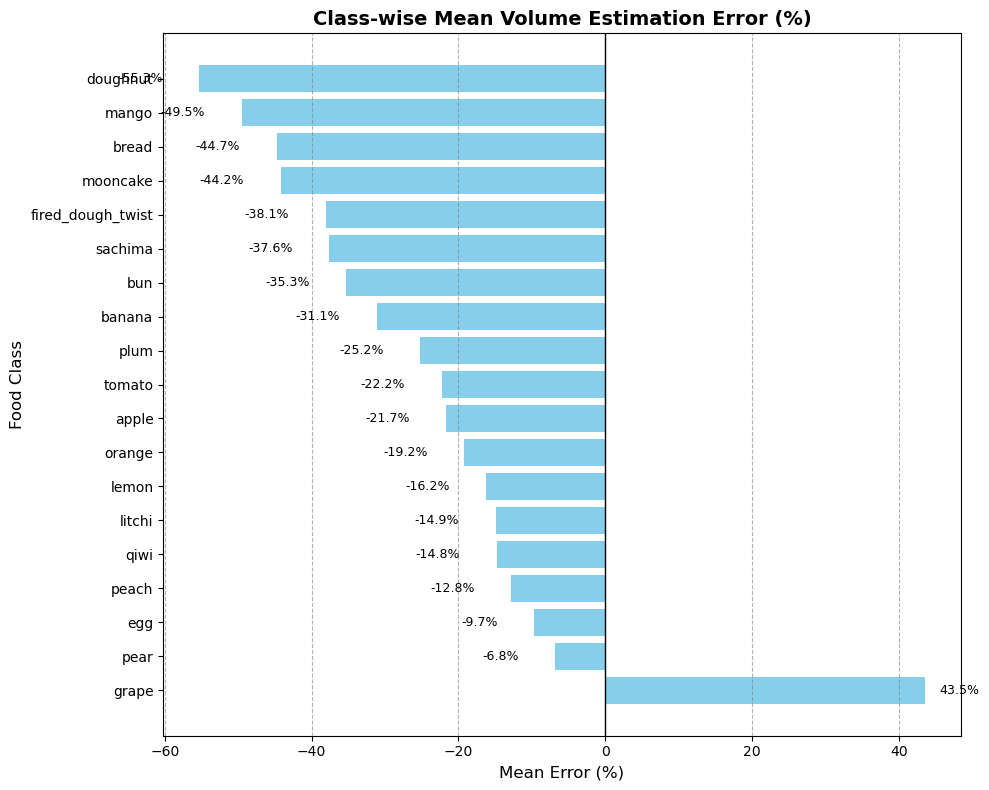

In [19]:
import matplotlib.pyplot as plt

mean_error_sorted = mean_error_per_class.sort_values(by='error_percent', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(mean_error_sorted['class'], mean_error_sorted['error_percent'], color='skyblue')

ax.axvline(0, color='black', linewidth=1)

ax.grid(axis='x', linestyle='--', color='grey', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + (2 if width >= 0 else -5)
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', ha='left' if width > 0 else 'right', fontsize=9)

ax.set_xlabel('Mean Error (%)', fontsize=12)
ax.set_ylabel('Food Class', fontsize=12)
ax.set_title('Class-wise Mean Volume Estimation Error (%)', fontsize=14, fontweight='bold')

ax.invert_yaxis()


plt.tight_layout()


plt.savefig('mean_error_per_class_polished.png', dpi=300)


plt.show()
